## Data cleaning 
## EDA 
## Feature engineering

In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Insights and Observation
 We find few column there is a missing value [Rating,Type,content Rating,Current Version,Android Version]

In [14]:
# check is there any missing value or not 
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data Cleaning

In [46]:

df_cp = df.copy()

In [47]:
# Data cleaning with reviews column
# check the datatypes of review column 
# also clerify that all the values are integer or not 

df_cp['Reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype 
--------------  ----- 
10841 non-null  object
dtypes: object(1)
memory usage: 84.8+ KB


In [48]:
# let's convert this datatypes into int
df_cp['Reviews'] = df_cp['Reviews'].astype(int)
# here it show the error it means there is value which can be not numeric value 

ValueError: invalid literal for int() with base 10: '3.0M'

In [49]:
df_cp[~df_cp['Reviews'].str.isnumeric()] # String value but not numeric
# here we can see that Reviews is 3.4M

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [50]:
# now let's drop the this row 
df_cp.drop(index=10472,inplace=True)

In [52]:
df_cp['Reviews']=df_cp['Reviews'].astype(int)

In [53]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [ ]:
# Working in Size column
df_cp['Size'].unique()
# here we can see that some values are in M and some values are in K 
# but we need to convert this value in integer

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [70]:
df_cp['Size'] = df_cp['Size'].str.replace('M','000')
df_cp['Size'] = df_cp['Size'].str.replace('k','')
df_cp['Size'] = df_cp['Size'].replace('Varies with device',np.nan)

In [ ]:
df_cp['Size'] = df_cp['Size'].astype(float)

In [73]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
# work in installs column 
df_cp['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [76]:
df_cp['Installs'] = df_cp['Installs'].str.replace('+','')
df_cp['Installs'] = df_cp['Installs'].str.replace(',','')
df_cp['Installs'] = df_cp['Installs'].replace('Free',np.nan)

In [80]:
df_cp['Installs']= df_cp['Installs'].astype(int)

In [83]:
# working on Price 
special_char = ['$']
cols = ['Price']
for chr in special_char:
    for col in cols:
        df_cp[col] = df_cp[col].str.replace(chr,'')

In [84]:
df_cp['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [85]:
df_cp['Price'] = df_cp['Price'].astype(float)

In [86]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [88]:
# work on last update 
df_cp['Last Updated'] = pd.to_datetime(df_cp['Last Updated'])
df_cp['Lst_day_update'] = df_cp['Last Updated'].dt.day
df_cp['Lst_month_update'] = df_cp['Last Updated'].dt.month
df_cp['Lst_year_update'] = df_cp['Last Updated'].dt.year

In [90]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   App               10840 non-null  object        
 1   Category          10840 non-null  object        
 2   Rating            9366 non-null   float64       
 3   Reviews           10840 non-null  int64         
 4   Size              9145 non-null   float64       
 5   Installs          10840 non-null  int64         
 6   Type              10839 non-null  object        
 7   Price             10840 non-null  float64       
 8   Content Rating    10840 non-null  object        
 9   Genres            10840 non-null  object        
 10  Last Updated      10840 non-null  datetime64[ns]
 11  Current Ver       10832 non-null  object        
 12  Android Ver       10838 non-null  object        
 13  Lst_day_update    10840 non-null  int32         
 14  Lst_month_update  10840 non

In [91]:
df_cp.drop('Last Updated',axis=1,inplace=True)

In [92]:
df_cp.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Lst_day_update,Lst_month_update,Lst_year_update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018


In [ ]:
df_cp.to_csv('google_clean_data.csv')
# saving the cleaned data in csv file 

## EDA

In [ ]:
# let's check there is a duplicate data or not 
df_cp[df_cp.duplicated(subset=['App'])].shape
# (1181, 15) this numbers of data are duplicate so we need to drop this all data

(1181, 15)

In [100]:
df_cp = df_cp.drop_duplicates(subset=['App'],keep='first')

In [ ]:
df_cp.shape
# we have successfully drop the all duplicate values

(9659, 15)

## Explore Data

In [105]:
# list out the numeric feature and categorial feature 
numeric_feature = [feature for feature in df_cp.columns if df_cp[feature].dtype != 'O']
categorial_feature = [feature for feature in df_cp.columns if df_cp[feature].dtype == 'O']
print(numeric_feature)
print(categorial_feature)

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Lst_day_update', 'Lst_month_update', 'Lst_year_update']
['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## Feature Information
Below is the list of all features in the dataset for reference.
App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Last Updated
Last Updated Day
Last Updated Month
Last Updated Year

In [110]:
# proportion of count data on categorial columns 
for col in categorial_feature:
    print(df_cp[col].value_counts(normalize=True)) #it gives the percentage
    print("******************************")

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.000104
Tic Tac CK                                        0.000104
INFAMY RO                                         0.000104
CK Call NEW                                       0.000104
Ck Coif                                           0.000104
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.000104
Dance School Stories - Dance Dreams Come True     0.000104
3D Bowling                                        0.000104
Mind Games Pro                                    0.000104
iHoroscope - 2018 Daily Horoscope & Astrology     0.000104
Name: proportion, Length: 9659, dtype: float64
******************************
Category
FAMILY                 0.189668
GAME                   0.099286
TOOLS                  0.085620
BUSINESS               0.043483
MEDICAL                0.040895
PERSONALIZATION        0.038927
PRODUCTIVITY           0.038720
LIFESTYLE              0.038203
FINA

## Univariate Analysis

Univariate analysis means analyzing one variable (feature/column) at a time.
The goal is to understand the distribution, patterns, and characteristics of that single variable.

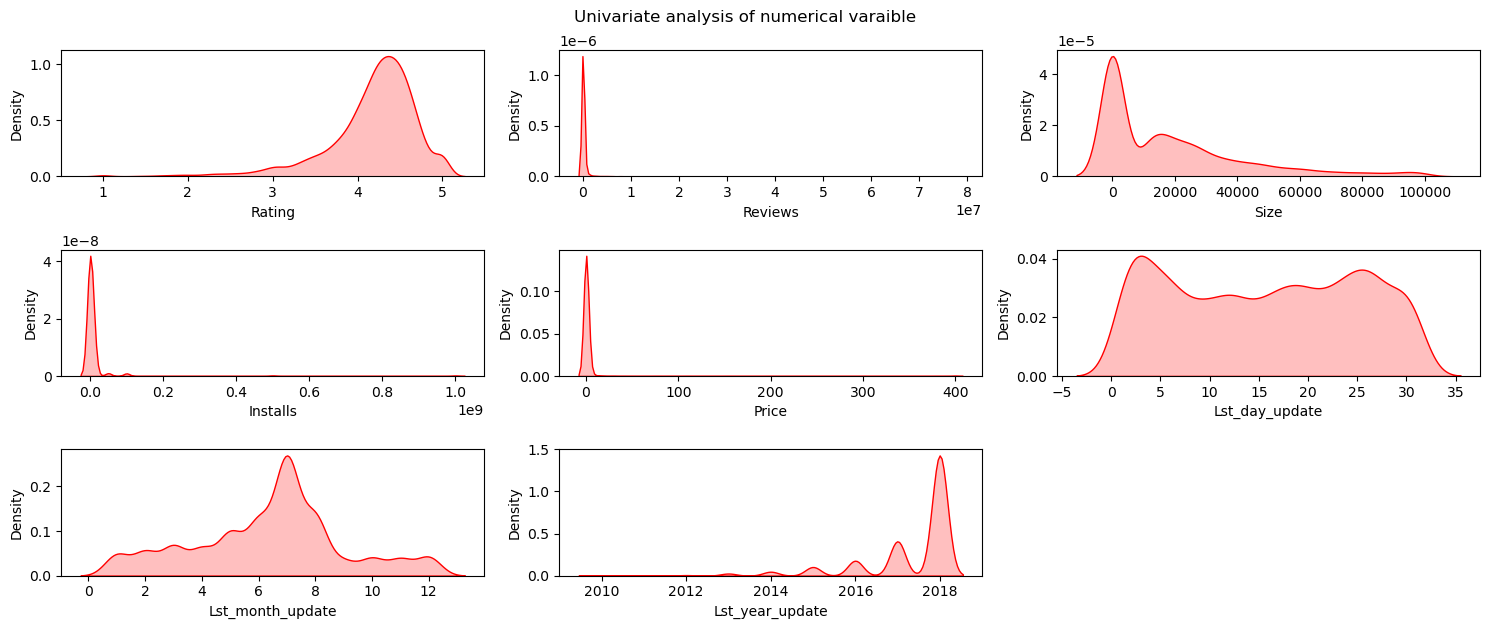

In [121]:
# Proportion of count data on numerical column
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
plt.suptitle("Univariate analysis of numerical varaible")

for i in range(0,len(numeric_feature)):
   plt.subplot(5,3,i+1)
   sns.kdeplot(x=df_cp[numeric_feature[i]],fill=True,color='r')
   plt.xlabel(numeric_feature[i])
   plt.tight_layout()

## Observation
Rating ,Lst_year updated are left skewed and Reviews,size,installs and price are right skewed


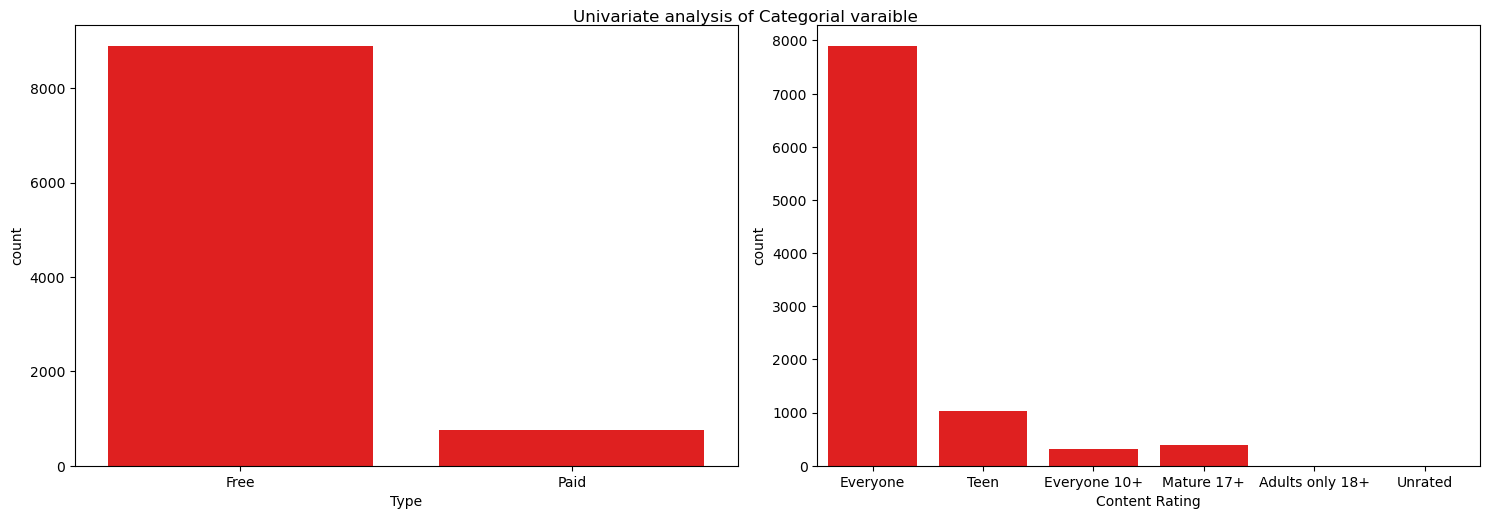

In [ ]:
# For categorial varaible 
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of Categorial varaible")
category = ['Type', 'Content Rating']
for i in range(0,len(category)):
   plt.subplot(3,2,i+1)
   sns.countplot(x=df_cp[category[i]],fill=True,color='r')
   plt.xlabel(category[i])
   plt.tight_layout()